# Spotitfy Billboard
This analysis is playing with distance between musics and centers. It uses euclidean distance to identify musics similarity.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import eda_aid as ea
import numpy as np
import seaborn as sns
import math

import ipywidgets as widgets
from IPython.display import display
from IPython.core.display import HTML

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
file =  '../data/billboard_24years_lyrics_spotify.csv'
df = pd.read_csv(file)
df = df[~df['danceability'].isna()]
df = df.drop_duplicates(subset='songurl', keep='first')
ed = ea.eda_aid(df)

EDA Aid initialized with 419 rows and 26 columns:
 - Numeric: 15
 - Object: 11
 - Boolean: 0
 - Datetime: 0


In [14]:
ed.columns_df()

,type,missing_count,missing_proportions,non_missing_count,unique_values
name,,,,,
ranking,numeric,0,0.0,419,99
year,numeric,0,0.0,419,8
danceability,numeric,0,0.0,419,297
energy,numeric,0,0.0,419,282
key,numeric,0,0.0,419,12
loudness,numeric,0,0.0,419,405
mode,numeric,0,0.0,419,2
speechiness,numeric,0,0.0,419,318
acousticness,numeric,0,0.0,419,376


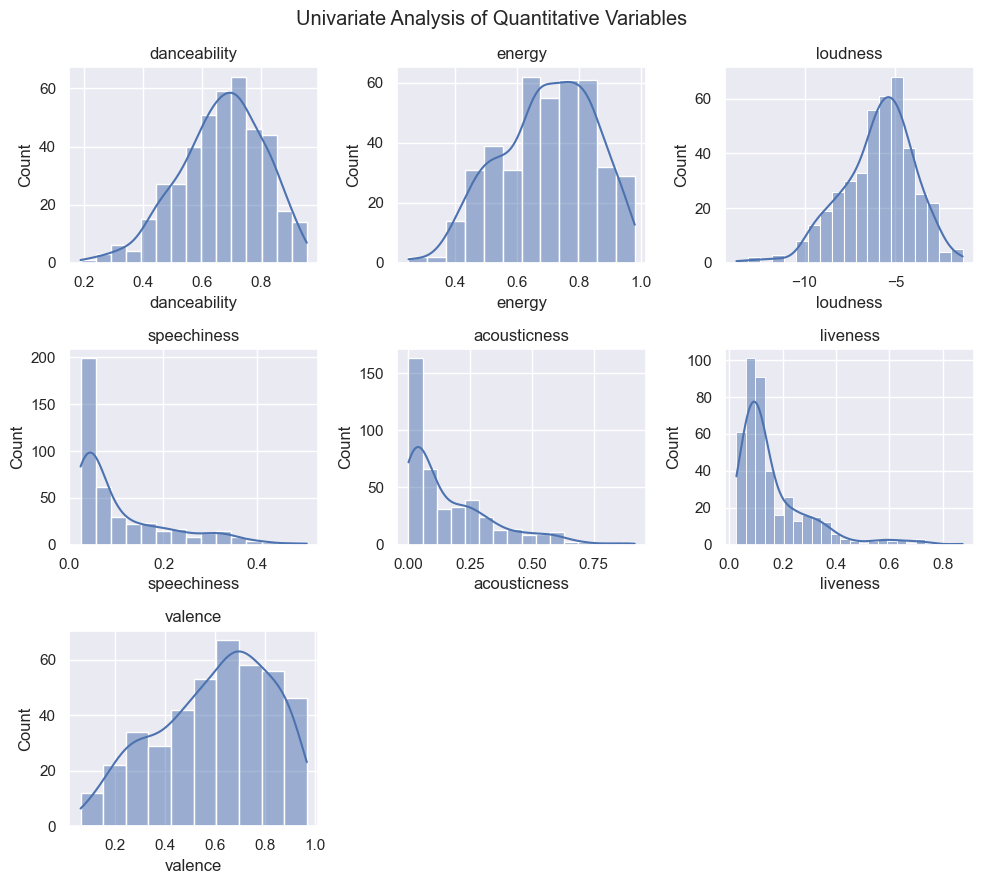

In [15]:
X_cols = ['danceability','energy','loudness','speechiness','acousticness','liveness','valence']
ed.eda_quant_uni(X_cols)

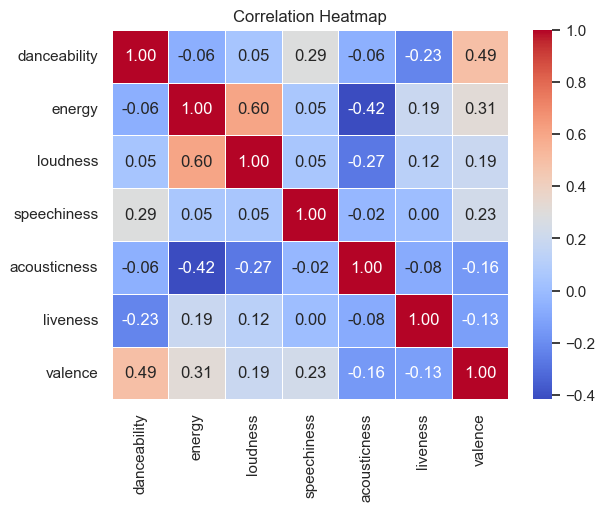

In [16]:
correlation_matrix = df[X_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Calculating Distance from every music and the center of the mainstream.

In [17]:
X = df[X_cols]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
center = np.mean(X_scaled, axis=0)
distances = np.linalg.norm(X_scaled - center, axis=1)
df['distance_from_center'] = distances
df['obviouness'] = 1/distances
df.sort_values('obviouness').head()

,ranking,song,band_singer,songurl,titletext,url,year,lyrics,uri,danceability,...,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,distance_from_center,obviouness
545,19,My Immortal,Evanescence,/wiki/My_Immortal_(song),My Immortal,/wiki/Evanescence,2004,I'm so tired of being here\nSuppressed by all ...,spotify:track:4UzVcXufOhGUwF56HT7b8M,0.190,...,0.101,79.012,audio_features,4UzVcXufOhGUwF56HT7b8M,https://api.spotify.com/v1/tracks/4UzVcXufOhGU...,https://api.spotify.com/v1/audio-analysis/4UzV...,262533.0,4.0,1.308462,0.764256
191,59,Only Time,Enya,/wiki/Only_Time,Only Time,/wiki/Enya,2001,Who can say where the road goes?\nWhere the da...,spotify:track:6FLwmdmW77N1Pxb1aWsZmO,0.418,...,0.213,82.803,audio_features,6FLwmdmW77N1Pxb1aWsZmO,https://api.spotify.com/v1/tracks/6FLwmdmW77N1...,https://api.spotify.com/v1/audio-analysis/6FLw...,218547.0,4.0,1.276496,0.783394
225,88,It's a Great Day to Be Alive,Travis Tritt,/wiki/It%27s_a_Great_Day_to_Be_Alive,It's a Great Day to Be Alive,/wiki/Travis_Tritt,2001,I got rice cookin' in the microwave\nGot a thr...,spotify:track:2wOtNLScRaNewSnBYhej87,0.336,...,0.536,140.770,audio_features,2wOtNLScRaNewSnBYhej87,https://api.spotify.com/v1/tracks/2wOtNLScRaNe...,https://api.spotify.com/v1/audio-analysis/2wOt...,249987.0,4.0,1.039910,0.961622
132,14,It's Been Awhile,Staind,/wiki/It%27s_Been_Awhile,It's Been Awhile,/wiki/Staind,2001,And it's been awhile\nSince I could hold my he...,spotify:track:6voiazWpdz7U8woo8O44HR,0.425,...,0.078,119.582,audio_features,6voiazWpdz7U8woo8O44HR,https://api.spotify.com/v1/tracks/6voiazWpdz7U...,https://api.spotify.com/v1/audio-analysis/6voi...,267347.0,4.0,0.976028,1.024561
306,45,Can't Get You Out of My Head,Kylie Minogue,/wiki/Can%27t_Get_You_Out_of_My_Head,Can't Get You Out of My Head,/wiki/Kylie_Minogue,2002,"La-la-la, la-la-la-la-la\nLa-la-la, la-la-la-l...",spotify:track:4w2XBHvs8g1HNf406G1vbB,0.536,...,0.243,128.017,audio_features,4w2XBHvs8g1HNf406G1vbB,https://api.spotify.com/v1/tracks/4w2XBHvs8g1H...,https://api.spotify.com/v1/audio-analysis/4w2X...,365213.0,4.0,0.922176,1.084391


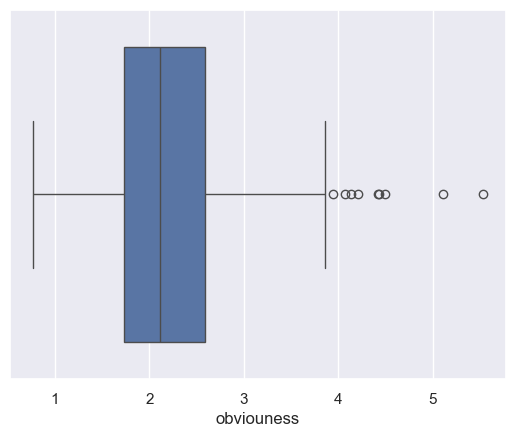

In [19]:
sns.boxplot(df['obviouness'], orient='h')
plt.show()

In [20]:
p25 = df['obviouness'].quantile(0.25)
p75 = df['obviouness'].quantile(0.75)
iiq = p75-p25

limite_inferior = p25-1.5*iiq
limite_superior = p75+1.5*iiq

In [21]:
df[df['obviouness']>limite_superior].sort_values('obviouness', ascending=False)

,ranking,song,band_singer,songurl,titletext,url,year,lyrics,uri,danceability,...,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,distance_from_center,obviouness
444,44,Miss Independent,Kelly Clarkson,/wiki/Miss_Independent_(Kelly_Clarkson_song),Miss Independent,/wiki/Kelly_Clarkson,2003,Miss independent\nMiss self-sufficient\nMiss k...,spotify:track:2CZi8d774dBB0wiuWMIpr8,0.655,...,0.615,175.973,audio_features,2CZi8d774dBB0wiuWMIpr8,https://api.spotify.com/v1/tracks/2CZi8d774dBB...,https://api.spotify.com/v1/audio-analysis/2CZi...,214787.0,4.0,0.180700,5.534035
396,15,All I Have,Jennifer Lopez,/wiki/All_I_Have_(song),All I Have,/wiki/Jennifer_Lopez,2003,Love is life and life is living\nIt's very spe...,spotify:track:3kgutGd839IOYRl6ekeq6V,0.699,...,0.472,83.074,audio_features,3kgutGd839IOYRl6ekeq6V,https://api.spotify.com/v1/tracks/3kgutGd839IO...,https://api.spotify.com/v1/audio-analysis/3kgu...,254467.0,4.0,0.195847,5.106026
323,58,More Than A Woman,Aaliyah,/wiki/More_than_a_Woman_(Aaliyah_song),More Than A Woman,/wiki/Aaliyah,2002,"Passion, instant\nSweat beads, feel me\nCupid'...",spotify:track:4x2YdtTppdbL4kHPOjaunq,0.655,...,0.759,86.968,audio_features,4x2YdtTppdbL4kHPOjaunq,https://api.spotify.com/v1/tracks/4x2YdtTppdbL...,https://api.spotify.com/v1/audio-analysis/4x2Y...,229867.0,4.0,0.222520,4.493969
587,50,With You,Jessica Simpson,/wiki/With_You_(Jessica_Simpson_song),With You,/wiki/Jessica_Simpson,2004,"Oh-oh, oh-oh\n\nThe real me is a Southern girl...",spotify:track:7pNJ1T9TGbVbNHKaLhhPri,0.553,...,0.605,94.487,audio_features,7pNJ1T9TGbVbNHKaLhhPri,https://api.spotify.com/v1/tracks/7pNJ1T9TGbVb...,https://api.spotify.com/v1/audio-analysis/7pNJ...,191827.0,4.0,0.225905,4.426649
133,15,U Remind Me,Usher,/wiki/U_Remind_Me,U Remind Me,/wiki/Usher_(musician),2001,"Yo, I ain't seen you in a minute\nBut I got so...",spotify:track:2QsZVnbWVSjKMXK6K3uRBL,0.657,...,0.726,93.985,audio_features,2QsZVnbWVSjKMXK6K3uRBL,https://api.spotify.com/v1/tracks/2QsZVnbWVSjK...,https://api.spotify.com/v1/audio-analysis/2QsZ...,266893.0,4.0,0.226342,4.418091
596,56,Roses,OutKast,/wiki/Roses_(Outkast_song),Roses,/wiki/OutKast,2004,"Caroline (Caroline), see, Caroline\nAll the gu...",spotify:track:6bUNEbXT7HovLW6BgPCBsb,0.751,...,0.509,108.970,audio_features,6bUNEbXT7HovLW6BgPCBsb,https://api.spotify.com/v1/tracks/6bUNEbXT7Hov...,https://api.spotify.com/v1/audio-analysis/6bUN...,369573.0,4.0,0.237635,4.208143
300,42,No Such Thing,John Mayer,/wiki/No_Such_Thing_(John_Mayer_song),No Such Thing,/wiki/John_Mayer,2002,"""Welcome to the real world"", she said to me\nC...",spotify:track:6Vecwo7AHst9V2CE3kmwr0,0.668,...,0.571,131.918,audio_features,6Vecwo7AHst9V2CE3kmwr0,https://api.spotify.com/v1/tracks/6Vecwo7AHst9...,https://api.spotify.com/v1/audio-analysis/6Vec...,231467.0,4.0,0.242163,4.129450
433,39,So Gone,Monica,/wiki/So_Gone,So Gone,/wiki/Monica_(entertainer),2003,"So gone over you, you, you, you\nYeah, new Mon...",spotify:track:6BIcjFZIVDZxNAcofRFPx4,0.618,...,0.586,81.975,audio_features,6BIcjFZIVDZxNAcofRFPx4,https://api.spotify.com/v1/tracks/6BIcjFZIVDZx...,https://api.spotify.com/v1/audio-analysis/6BIc...,242773.0,4.0,0.245551,4.072473
567,35,She Will Be Loved,Maroon 5,/wiki/She_Will_Be_Loved,She Will Be Loved,/wiki/Maroon_5,2004,Beauty queen of only eighteen\nShe had some tr...,spotify:track:4llK75pXNWZz6KAho2Gp16,0.651,...,0.465,102.000,audio_features,4llK75pXNWZz6KAho2Gp16,https://api.spotify.com/v1/tracks/4llK75pXNWZz...,https://api.spotify.com/v1/audio-analysis/4llK...,259453.0,4.0,0.253918,3.938272


In [22]:
def compare(df, id, quant_var=None) -> None:
    n_graphs = len(quant_var)
    n_row = math.ceil(n_graphs / 3)
    fig, axes = plt.subplots(nrows = n_row, ncols = 3, figsize=(10,n_row*3)) 
    axes=axes.flatten()
    temp = df[df['id']== id]
    song = temp['song'].values[0]
    singer = temp['band_singer'].values[0]
    title_text = f'{song} by {singer}'
    fig.suptitle(title_text)
    for v, ax in zip(quant_var, axes):
        sns.histplot(data=df, x = v, ax = ax, kde=True)
        ax.axvline(x=temp[v].values, color='red', linestyle='--', linewidth=1.5)
        ax.set_title(v)
    for ax in axes[n_graphs:]:
        ax.set_visible(False)
    plt.tight_layout()
    plt.show()

Most Obvious music: https://www.youtube.com/watch?v=esJk2hnckLs

Least Obvious: https://www.youtube.com/watch?v=5anLPw0Efmo

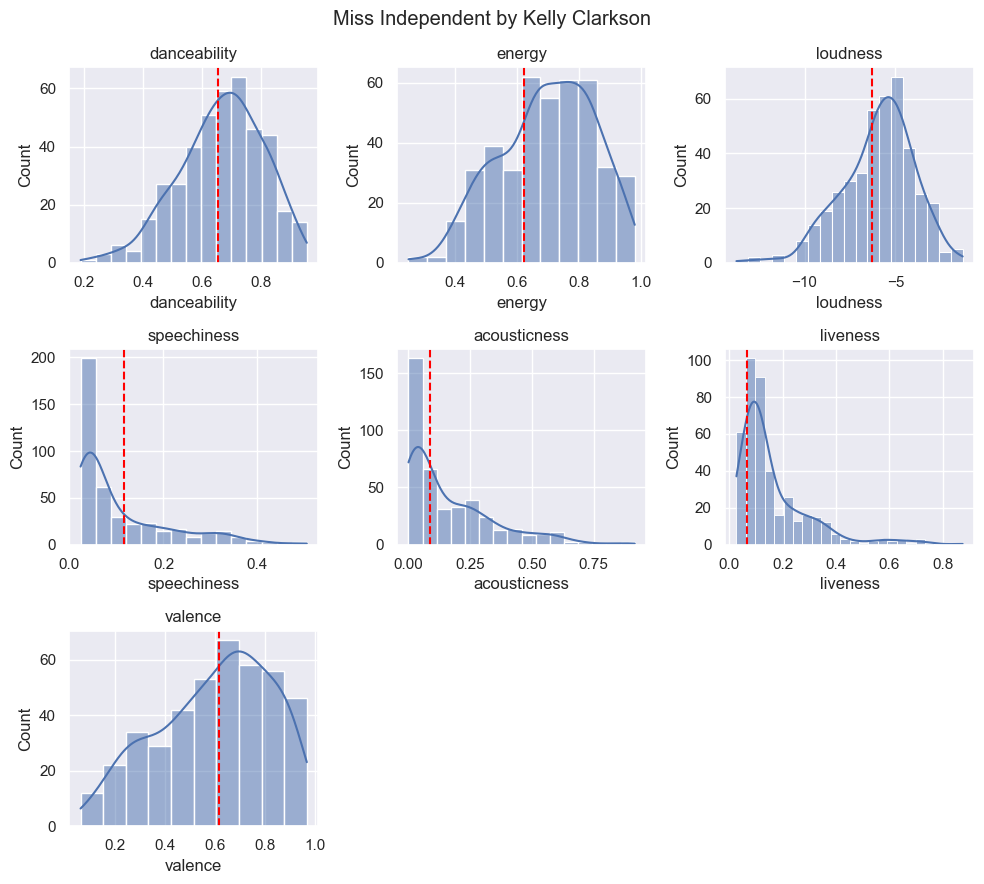

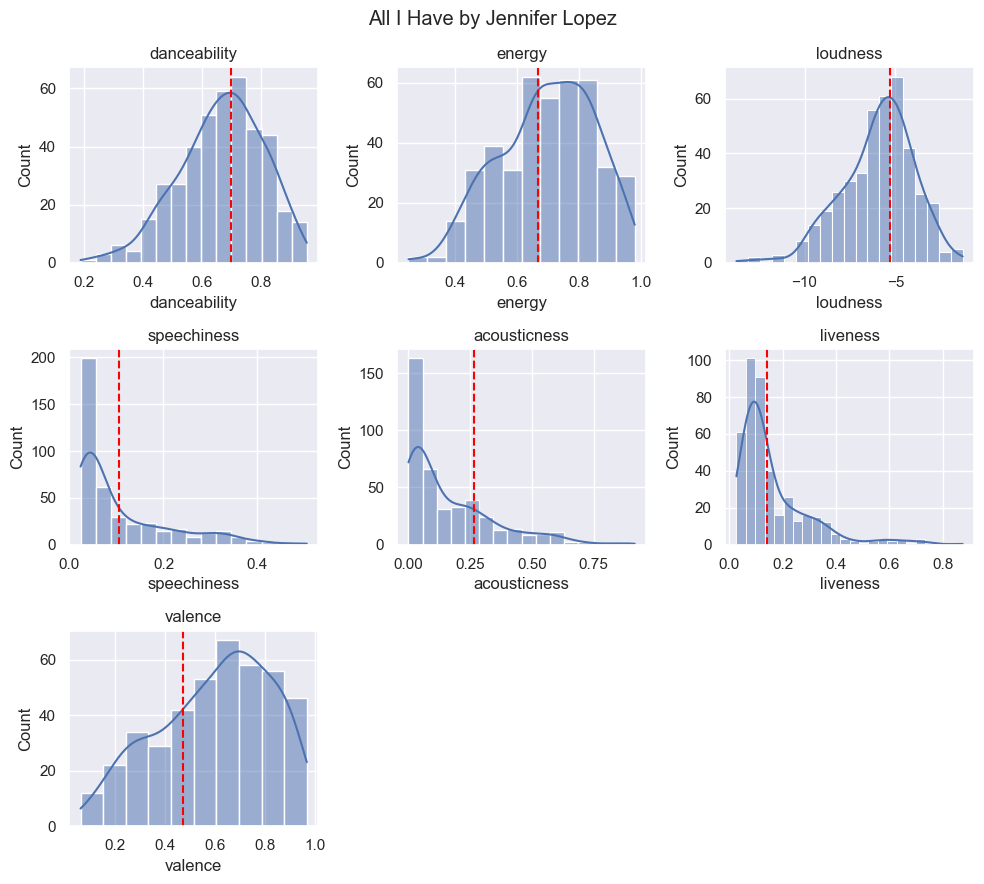

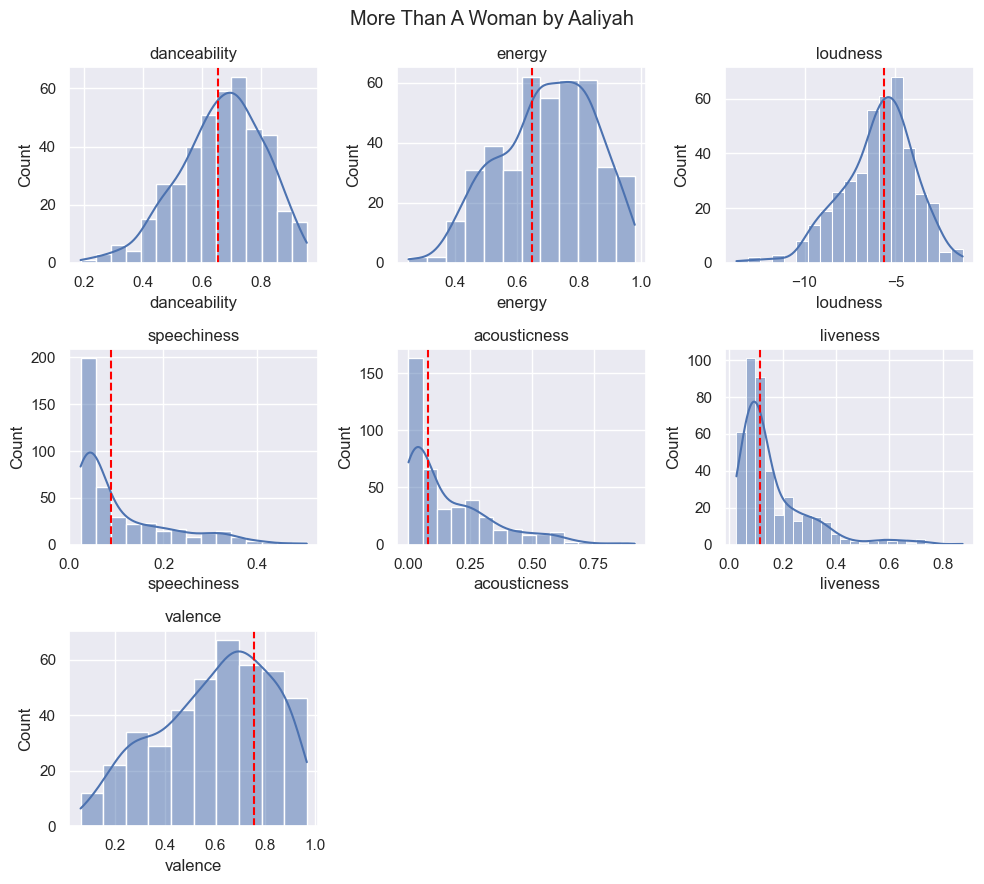

In [23]:
obvious = df.sort_values('obviouness').tail(3).sort_values('obviouness', ascending=False)
for id in obvious['id']:
    compare(df,id,X_cols)

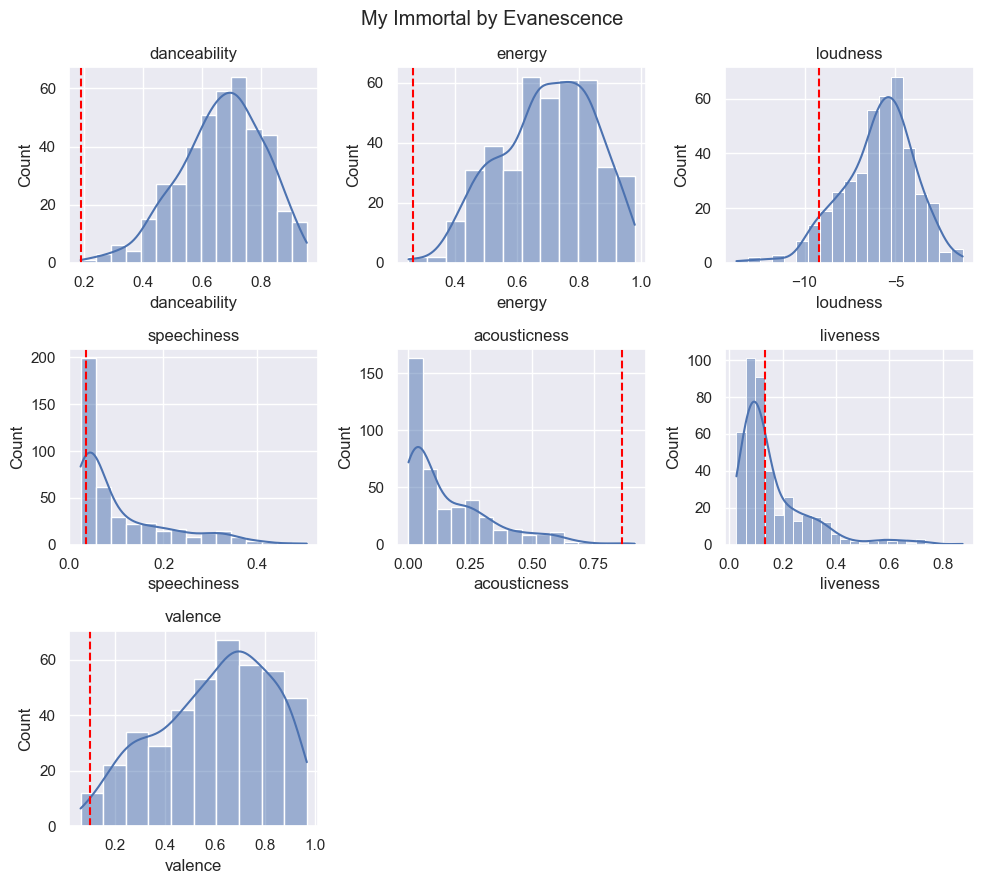

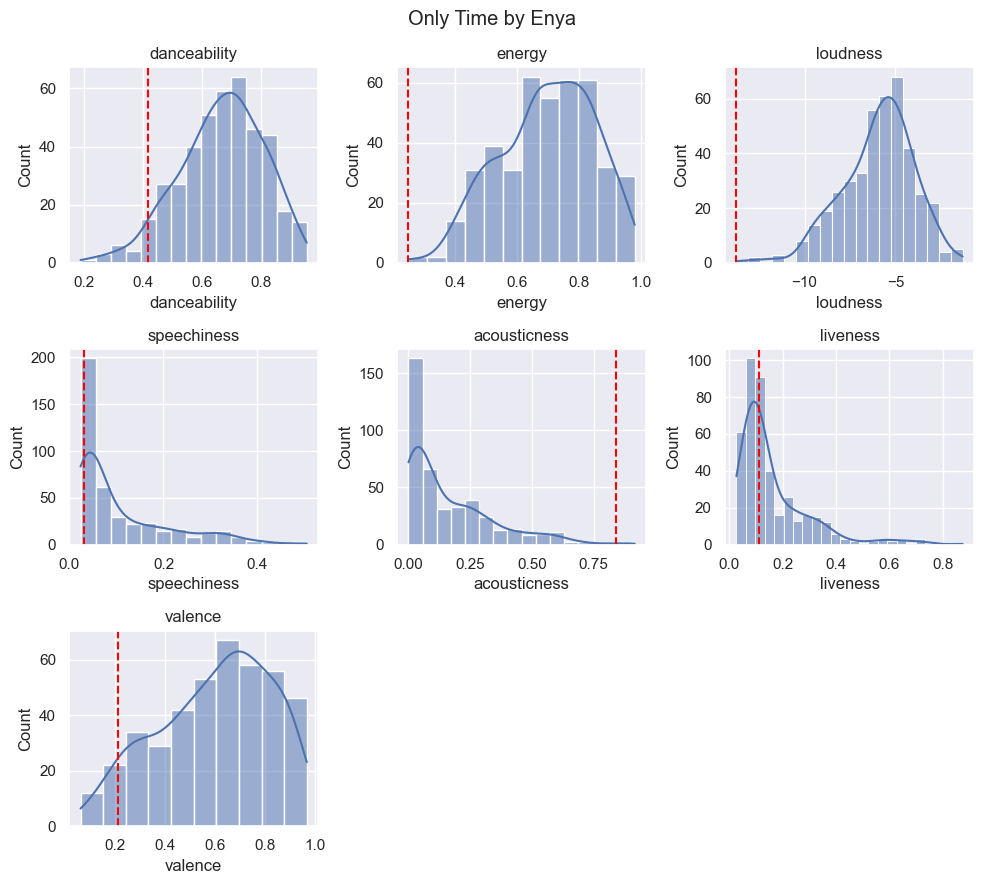

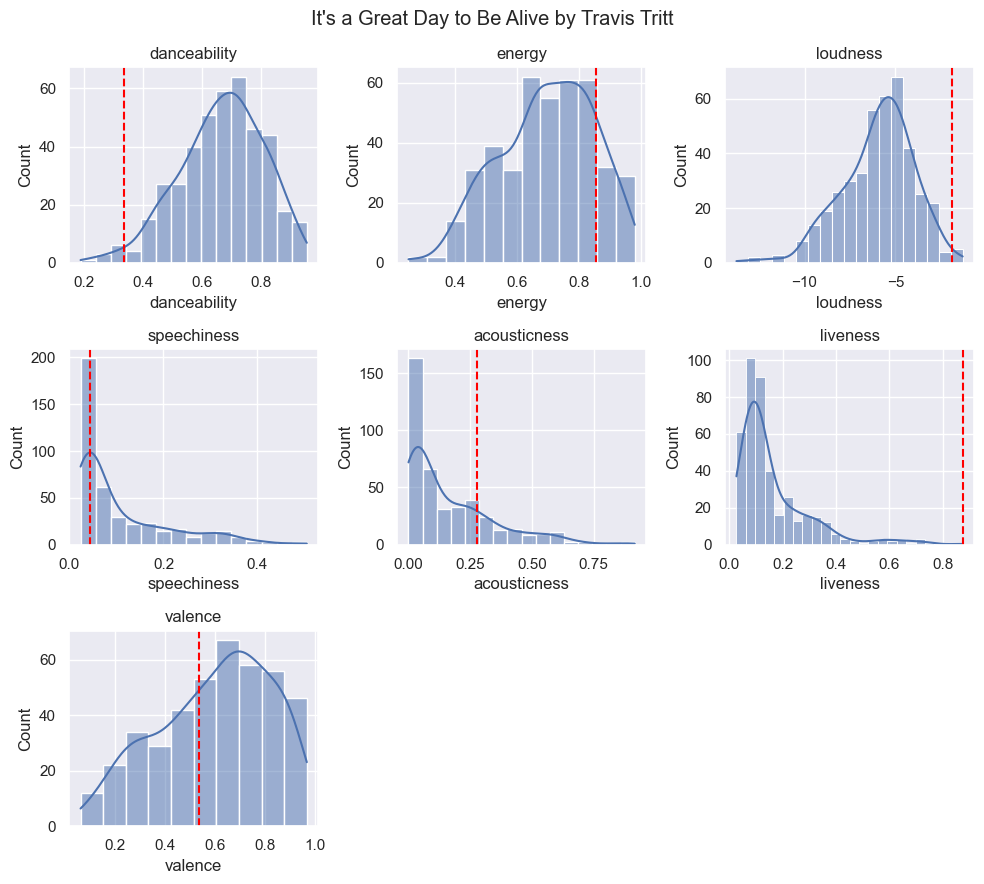

In [24]:
non_obvious = df.sort_values('obviouness').head(3)
for id in non_obvious['id']:
    compare(df,id,X_cols)

## Finding closest music from user preferences:

In [25]:
danceability = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='danceability')
energy = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='energy')
loudness = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='loudness')
speechiness = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='speechiness')
acousticness = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='acousticness')
liveness = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='liveness')
valence = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='valence')
display(danceability, energy, loudness, speechiness, acousticness, liveness, valence)

FloatSlider(value=0.5, description='danceability', max=1.0, step=0.01)

FloatSlider(value=0.5, description='energy', max=1.0, step=0.01)

FloatSlider(value=0.5, description='loudness', max=1.0, step=0.01)

FloatSlider(value=0.5, description='speechiness', max=1.0, step=0.01)

FloatSlider(value=0.5, description='acousticness', max=1.0, step=0.01)

FloatSlider(value=0.5, description='liveness', max=1.0, step=0.01)

FloatSlider(value=0.5, description='valence', max=1.0, step=0.01)

In [37]:
user_options = [danceability.value, energy.value, loudness.value, speechiness.value, acousticness.value, liveness.value, valence.value]
features = ['danceability','energy','loudness','speechiness','acousticness','liveness','valence']
X = df[features]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
distances = np.linalg.norm(X_scaled - user_options, axis=1)
df['distance_from_user'] = distances
music = df.sort_values('distance_from_user').head(1)
link_text = f"{music['song'].values[0]} by {music['band_singer'].values[0]}"
spotify_uri = music['uri'].values[0]
track_id = spotify_uri.split("spotify:track:")[1]
link_url = 'https://open.spotify.com/track/'+track_id
HTML(f'<a href="{link_url}" target="_blank">{link_text}</a>')